In [1]:
import pandas as pd
import re
import numpy as np
import joblib
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
%matplotlib inline 
from wordcloud import WordCloud

In [3]:
columns=['comment_english','label']
df = pd.read_excel(r'C:\Users\Hp\TUGAS AKHIR 2\data_facebook.xlsx', usecols=columns)
df = df.replace(r'^\s*$', np.nan, regex=True)
df.head(4000)

,comment_english,label
0,"['suggestion', 'good']",positive
1,"['suggestion', 'cool']",positive
2,"['suggestion', 'cool', '']",positive
3,"['hmmm', 'tips', 'mimin', '']",negative
4,"['ticket', 'responds',' indohome ',' base ',' ...",negative
...,...,...
3995,"['function', 'telkomsel', 'points', 'serious',...",negative
3996,"['boss', 'infoya', 'just', 'access', 'ehh', 'h...",negative
3997,"['min', 'check', 'points', 'dial', 'exchange']",negative
3998,"['what', 'package', 'combo', 'sakti', 'min', '...",negative


In [4]:
df['polaritas'] = df.label.map({'positive':1, 'negative':-1})
df

,comment_english,label,polaritas
0,"['suggestion', 'good']",positive,1
1,"['suggestion', 'cool']",positive,1
2,"['suggestion', 'cool', '']",positive,1
3,"['hmmm', 'tips', 'mimin', '']",negative,-1
4,"['ticket', 'responds',' indohome ',' base ',' ...",negative,-1
...,...,...,...
6662,"['', 'hope', 'telkomsel', 'bonus', 'package', ...",negative,-1
6663,['carcass'],negative,-1
6664,"['come on', 'pakek', 'card']",negative,-1
6665,"['person', 'bored', 'card', 'telkom', 'net', '...",negative,-1


In [5]:
x = np.array(df['comment_english'].transpose())
y = df['polaritas']
print (x.shape)
print (y.shape)

(6667,)
(6667,)


In [6]:
#vektorisasi
vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(x)
print(x.shape)

(6667, 6483)


In [7]:
#splitting dataset ke dalam train dan test data (80 : 20)

xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2, random_state=42)

print ('\n total data train : ', ytrain.shape)
print ('\n total data test : ', ytest.shape)


 total data train :  (5333,)

 total data test :  (1334,)


In [8]:
print(xtrain.shape)
print(ytrain.shape)

(5333, 6483)
(5333,)


In [9]:
#klasifikasi data (80 : 20)
svc = SVC(kernel = "linear")

#memasukkan data training ke dalam klasifikasi SVM
svc = svc.fit(xtrain, ytrain)

#melakukan prediksi dari data test
predicted = svc.predict(xtest)
predicted

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

In [10]:
print(accuracy_score(ytest, predicted))

0.9250374812593704


In [11]:
print(classification_report(ytest, predicted))

              precision    recall  f1-score   support

          -1       0.92      0.99      0.95       986
           1       0.96      0.75      0.84       348

    accuracy                           0.93      1334
   macro avg       0.94      0.87      0.89      1334
weighted avg       0.93      0.93      0.92      1334



In [12]:
cnf_matrix = metrics.confusion_matrix(ytest, predicted)
cnf_matrix

array([[974,  12],
       [ 88, 260]], dtype=int64)

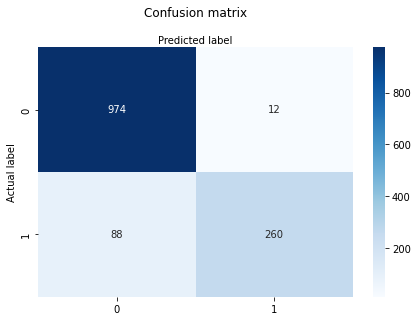

In [13]:
class_names=[-1,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()